# Credit Card Fraud Detection

### 1. Installing necessary libraries

In [151]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Loading dataset
For a dataset we used Kaggle dataset, available by the link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [152]:
zip_file_name = "archive (1).zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # Extract all the contents of zip file in current directory
    zip_ref.extractall()

# Now the csv file is available in the current directory
csv_file_name = "creditcard.csv"
df = pd.read_csv(csv_file_name)

In [153]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

### 3. Data Vizualization
2.1. Plotting correlation matrix for a dataset

In [154]:
#function for plotting correlation matrix
def plot_correlation_matrix(df):
    
    df = df.dropna(axis = 'columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    
    correlation_matrix = df.corr()
    plt.figure(num=None, figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
    
    plt.show()

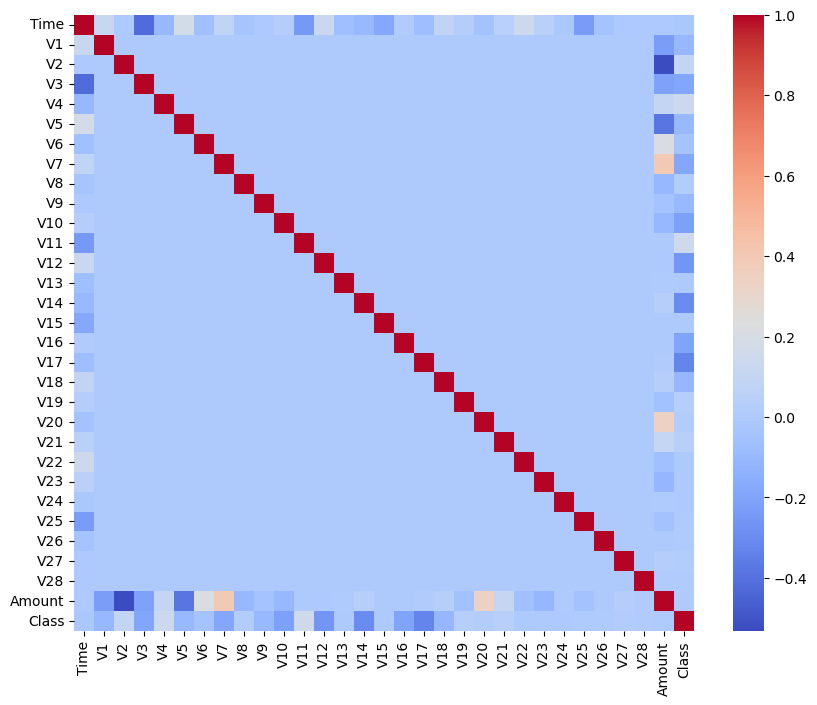

In [155]:
plot_correlation_matrix(df)

2.2 Plotiing class distribution

In [156]:
# function for plotting class distribution
def plot_class_distribution(df):
    plt.figure(figsize=(7,7))
    our_ax = sns.countplot(x='Class', data=df)
    
    
    counts = df['Class'].value_counts()
    
    # Add text annotations for the counts
    for i, count in enumerate(counts):
        our_ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
    
    
    plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
    plt.show()

### 4. Splitting the dataset

In [157]:
#separating the input features (X) and the target variable (Y)
x = df.drop(columns=['Class']) # X contains all columns except 'Class'
y = df['Class'] # Y contains only the 'Class' column, which is the target variable

In [158]:
#splitting dataset on train and val
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.25)

In [159]:
from sklearn.preprocessing import StandardScaler
#scale features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Models 

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

#function for making prediction and loading metrics and getting a table with results
def pred_metrics(model):
    #making the prediction
    y_pred = model.predict(X_test_scaled)
    #loading the metrics


    #calculate accuracy using the predicted and true target values (y_pred and y_test)
    acc = accuracy_score(y_test, y_pred)

    #calculate F1 score using the predicted and true target values (y_pred and y_test)
    f1 = f1_score(y_test, y_pred)

    #calculate precision score using the predicted and true target values (y_pred and y_test)
    prec = precision_score(y_test, y_pred)

    #calculate recall score using the predicted and true target values (y_pred and y_test)
    rec = recall_score(y_test, y_pred)
    
    # Getting the results

    results = pd.DataFrame([[acc, f1, prec, rec]],
                       columns = ["accuracy", "f1", "precision", "recall"])

    return results
    
    
    

### 5.1 Logistic Regression

In [161]:
model1 = LogisticRegression(random_state=0)
#training
model1.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [162]:
print("Logistic Regression Results:")
pred_metrics(model1)

Logistic Regression Results:


,accuracy,f1,precision,recall
0,0.999242,0.740385,0.905882,0.626016


### 5.2 Random Forest Classifier

In [163]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(random_state=0)
#training
model2.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=0)

In [164]:
print("Random Forest Classifier:")
pred_metrics(model2)

Random Forest Classifier:


,accuracy,f1,precision,recall
0,0.999508,0.844444,0.931373,0.772358


### Presicion-Recall Curves

In [165]:
y_pred1 = model1.predict(X_test_scaled)
acc1 = accuracy_score(y_test, y_pred1)
prec1 = precision_score(y_test, y_pred1)
rec1 = recall_score(y_test, y_pred1)

y_pred2 = model2.predict(X_test_scaled)
acc2 = accuracy_score(y_test, y_pred2)
prec2 = precision_score(y_test, y_pred2)
rec2 = recall_score(y_test, y_pred2)

In [166]:
def calc_precision_recall(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

# Test function

calc_precision_recall(y_test, y_pred1)

(0.9058823529411765, 0.6260162601626016)

In [167]:
import numpy as np

def calculate_scores(model, X_test_scaled, y_test):
    y_test_probs = model.predict_proba(X_test_scaled)[:,1]

    # Containers for true positive / false positive rates
    precision_scores = []
    recall_scores = []

    # Define probability thresholds to use, between 0 and 1
    probability_thresholds = np.linspace(0, 1, num=100)

    # Find true positive / false positive rate for each threshold
    for p in probability_thresholds:

        y_test_preds = [1 if prob > p else 0 for prob in y_test_probs]

        precision, recall = calc_precision_recall(y_test, y_test_preds)
            
        precision_scores.append(precision)
        recall_scores.append(recall)

    return precision_scores, recall_scores

#now calculate scores for both models
precision_scores_model1, recall_scores_model1 = calculate_scores(model1, X_test_scaled, y_test)
precision_scores_model2, recall_scores_model2 = calculate_scores(model2, X_test_scaled, y_test)

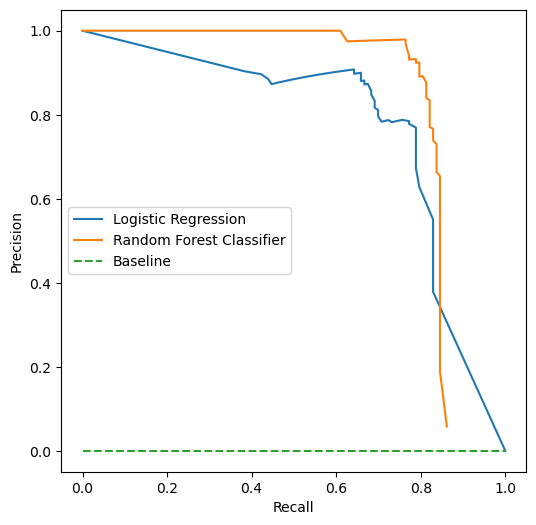

In [168]:
# Plot precision-recall curve
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall_scores_model1, precision_scores_model1, label='Logistic Regression')
ax.plot(recall_scores_model2, precision_scores_model2, label='Random Forest Classifier')
baseline = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left')
plt.show()